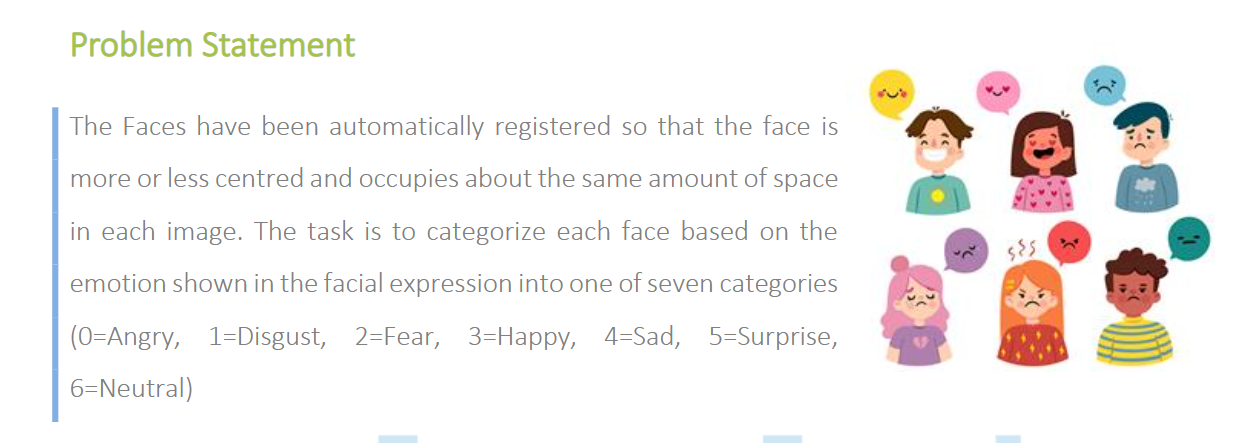

### Dataset Description
Dataset: https://www.kaggle.com/deadskull7/fer2013

#### Total Images: The Dataset consists of 28,709 examples
#### Fer.csv contains two columns, emotion,and pixels.
#### The emotioncolumn contains a numeric code ranging from 0 to 6, inclusive, for the emotion that is present in the image. 
#### The pixels column contains a string surrounded in quotes for each image Classes: 0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral

## Task 01

### • Do you get the same results if you run the Notebook multiple times without changing any parameters?
### • What is the effect of adding more neurons to each Conv2D layer?•What happens if we manipulate the value of dropout?
### • What is the effect of adding more activation layers to the network?   
### • What is the accuracy score if we use more dense layers in the model?
### •Does manipulating the learning rate affect the model? Justify your answer

In [1]:
#importing libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, AveragePooling2D, Activation, BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.metrics import categorical_accuracy
from tensorflow.keras.optimizers import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
print('TF Version:', tf.__version__)

TF Version: 2.6.0


In [2]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Loading data

In [3]:
label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
#names = ['emotion', 'pixels', 'usage']
df = pd.read_csv('/content/drive/MyDrive/NITW/DL/Assignment 02/fer2013.csv', na_filter=False)
im=df['pixels']
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


## Preparing the Dataset

As a part of this assignment, you will be performing the following tasks:

### •Prepare a detailed python notebook (similar to this one) using convolutional neural network for classifying the images from Fer.csv with the best accuracy
### •Prepare the dataset for the model 
### •Reshape and Normalize the data: 
## Hint:
#### Split pixels by space to get columns 
#### Reshape the Input Image (48, 48, 1)
#### Change the type of data to float32
### •Normalize and Train_Test Split
## Hint: 
#### Normalize the data by dividing with 255
#### Split data into train and test (90, 10)


In [ ]:
df.shape

(35887, 3)

In [4]:
def getData(filename):
    Y = []
    X = []
    first = True
    for line in open(filename):
      if first:
        first = False
      else:
        row = line.split(',')
        Y.append(int(row[0]))
        X.append([int(p) for p in row[1].split()])

    X, Y = np.array(X) / 255.0, np.array(Y)
    return X, Y 

In [5]:
filename ='/content/drive/MyDrive/NITW/DL/Assignment 02/fer2013.csv'
X, Y = getData(filename)
num_class = len(set(Y))
print('Number of Classes:', num_class)
print(X.shape, Y.shape)
N, D = X.shape
print(N,D)
X = X.reshape(N, 48, 48,1)
print(X.shape)

Number of Classes: 7
(35887, 2304) (35887,)
35887 2304
(35887, 48, 48, 1)


In [6]:
a = Y[:5, None]
print(a)
b=np.arange(num_class)
print(b)
(b == a).astype(np.float32)

[[0]
 [0]
 [2]
 [4]
 [6]]
[0 1 2 3 4 5 6]


array([[1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [7]:
#function to plot images
def plot(images, n=5, cmap='gray'):
    for i in range(n*n):
      plt.subplot(n,n,1+i)
      plt.axis('off')
      plt.imshow(images[i, :, :, 0], cmap=cmap)

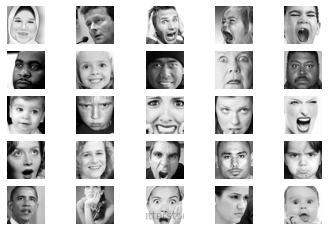

In [8]:
#split the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
y_train = (np.arange(num_class) == y_train[:, None]).astype(np.float32)
y_test = (np.arange(num_class) == y_test[:, None]).astype(np.float32)

plot(X_test, 5)

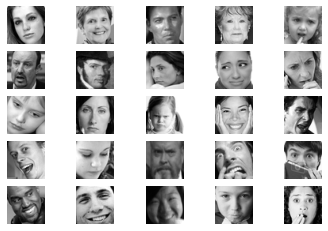

In [9]:
#creating samples from original data
def create_samples(image_series, n_samples=25):
    samples = image_series[np.random.randint(0, im.shape[0], size=n_samples)]
    samples.reset_index(drop=True, inplace=True)
    X = []
    for i in range(len(samples)):
        X.append([int(p) for p in samples[i].split()])
    samples = np.array(X)
    samples = samples.reshape((n_samples, 48, 48,1))
    return samples

samples = create_samples(im, 25)
plot(samples)

### CNN Model

## Define CNN Model

## Layer 1
### •2 Conv2d with 64 filters of 5,5 filter 
### •BatchNormalization layer 
### •Max Pooling layer with 2,2
### •Activation Relu

## Layer 2
### •2 Conv2d with 128 filters of 5,5 filter 
### •BatchNormalization layer
### •Max Pooling layer with 2,2
### •Activation Relu

##Layer 3
### •2 Conv2d with 256 liters of 3,3 filter
### •BatchNormalization layer
### •Max Pooling layer with 2,2
### •Activation Relu

###Layer 4
### •Flatten Layer
### •Dense Layer with 128 Neuron 
### •BatchNormalization 
### •Activation Relu
### •Dropout 0.25
### •Dense seven neurons with Softmax
### •Loss: Categorical cross-entropy
### •Optimizer: Adam

## Answer: What  parameters  should  be  chosen  to  classifythe  images  into  various  categoriesaccurately?



In [10]:
def my_model():
    model = Sequential()
    input_shape = (48,48,1)
    model.add(Conv2D(64, (5,5), input_shape=input_shape, activation='relu', padding='same'))
    model.add(Conv2D(64, (5,5), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(128, (5,5), activation='relu', padding='same'))
    model.add(Conv2D(128, (5,5), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(256, (5,5), activation='relu', padding='same'))
    model.add(Conv2D(256, (5,5), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(7))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

    return model

model = my_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        1664      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        102464    
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       409728    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

In [ ]:
#fit the model
model = my_model()
#K.set_value(model.optimizer.lr, 1e-3)
h = model.fit(x=X_train, y=y_train, 
              batch_size=64, epochs=10, 
              verbose=1, validation_data=(X_test, y_test), shuffle=True)

Epoch 1/10
505/505 [==============================] - 2960s 6s/step - loss: 1.6795 - accuracy: 0.3481 - val_loss: 1.7893 - val_accuracy: 0.2973
Epoch 2/10
505/505 [==============================] - 2981s 6s/step - loss: 1.2970 - accuracy: 0.5050 - val_loss: 1.2702 - val_accuracy: 0.5152
Epoch 3/10
505/505 [==============================] - 2989s 6s/step - loss: 1.1217 - accuracy: 0.5729 - val_loss: 1.2027 - val_accuracy: 0.5408
Epoch 4/10
505/505 [==============================] - 3007s 6s/step - loss: 1.0051 - accuracy: 0.6226 - val_loss: 1.1841 - val_accuracy: 0.5548
Epoch 5/10
505/505 [==============================] - 3004s 6s/step - loss: 0.8940 - accuracy: 0.6667 - val_loss: 1.1392 - val_accuracy: 0.5715
Epoch 6/10
505/505 [==============================] - 3002s 6s/step - loss: 0.7530 - accuracy: 0.7219 - val_loss: 1.1163 - val_accuracy: 0.6018
Epoch 7/10
505/505 [==============================] - 3002s 6s/step - loss: 0.5843 - accuracy: 0.7881 - val_loss: 1.1919 - val_accuracy: